In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
import xgboost
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'MyDrive'
%ls

Mounted at /content/drive
/content/drive/MyDrive
'10 22 2021.gdoc'
 breast-cancer.data
'car (1).data'
 checkmodel.h5
 CN_Homework1.gdoc
'CN_Homework 2.gdoc'
'Colab Notebooks'/
'Copy of Pepsi and Vending Refund Request.gform'
'Copy of Student Development Bank Deposit Form.gform'
'CV - 0121.gdoc'
'Data Science Notes.gdoc'
 ecoli.data
'Emma Project.gdoc'
'Emma Research Project.gdoc'
'E(mpower) Funds Request Form (File responses)'/
'E(mpower) Funds Request Form.gform'
'Example Stories.gdoc'
'final .gslides'
 final_practice.csv
'Final project Report.pdf'
'Final Report.gdoc'
'Flash cards.gslides'
 Homework03.ipynb
 Homework05_partII_test.csv
 Homework05_partII_train.csv
 Homework3.ipynb
 IMG_3326.HEIC
 KDDTest-21.csv
 KDDTest-21.txt
 KDDTest-.csv
 KDDTest+.txt
 KDDTrain-.csv
 KDDTrain+.txt
'List of Characters.gdoc'
 Paper.pdf
 Plotting_Correlation_HeatMap.jpg
'Procurement Requests (File responses)'/
'Procurement Requests.gform'
 PSD.gdoc
'Research Project_CN.gdoc'
'sentiment analysis.ipynb'


In [ ]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flag=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_type=['tcp','udp','icmp']

service=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}  


In [ ]:
train_df=pd.read_csv('KDDTrain+.txt',names=feature)
test_df=pd.read_csv('KDDTest+.txt',names=feature)

In [ ]:
test_21_df = pd.read_csv('KDDTest-21.txt', names= feature)

In [ ]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# remove attribute 'difficulty_level'
train_df.drop(['difficulty'],axis=1,inplace=True)
train_df.shape

(125973, 42)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# number of attack labels 
train_df['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [ ]:
def bar_graph(feature):
  train_df[feature].value_counts().plot(kind="bar",color='g')

In [ ]:
# number of attack labels 
train_df['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

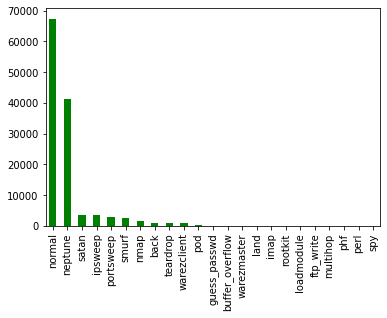

In [ ]:
bar_graph('label')

In [ ]:
# changing attack labels to their respective attack class
def changing_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
changing_label(train_df)

In [ ]:
# distribution of attack classes
train_df.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

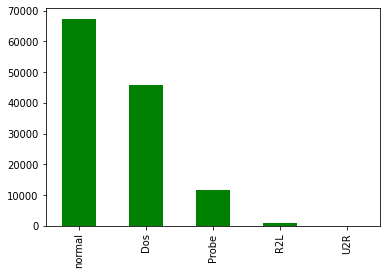

In [ ]:
bar_graph('label')

In [ ]:
# distribution of attack classes
#train_df.label.value_counts()

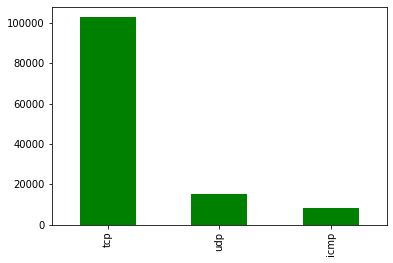

In [ ]:
bar_graph('protocol_type')

In [ ]:
service_count = train_df['service'].value_counts()
subset_service= list(service_count[:30].index)
service_count

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

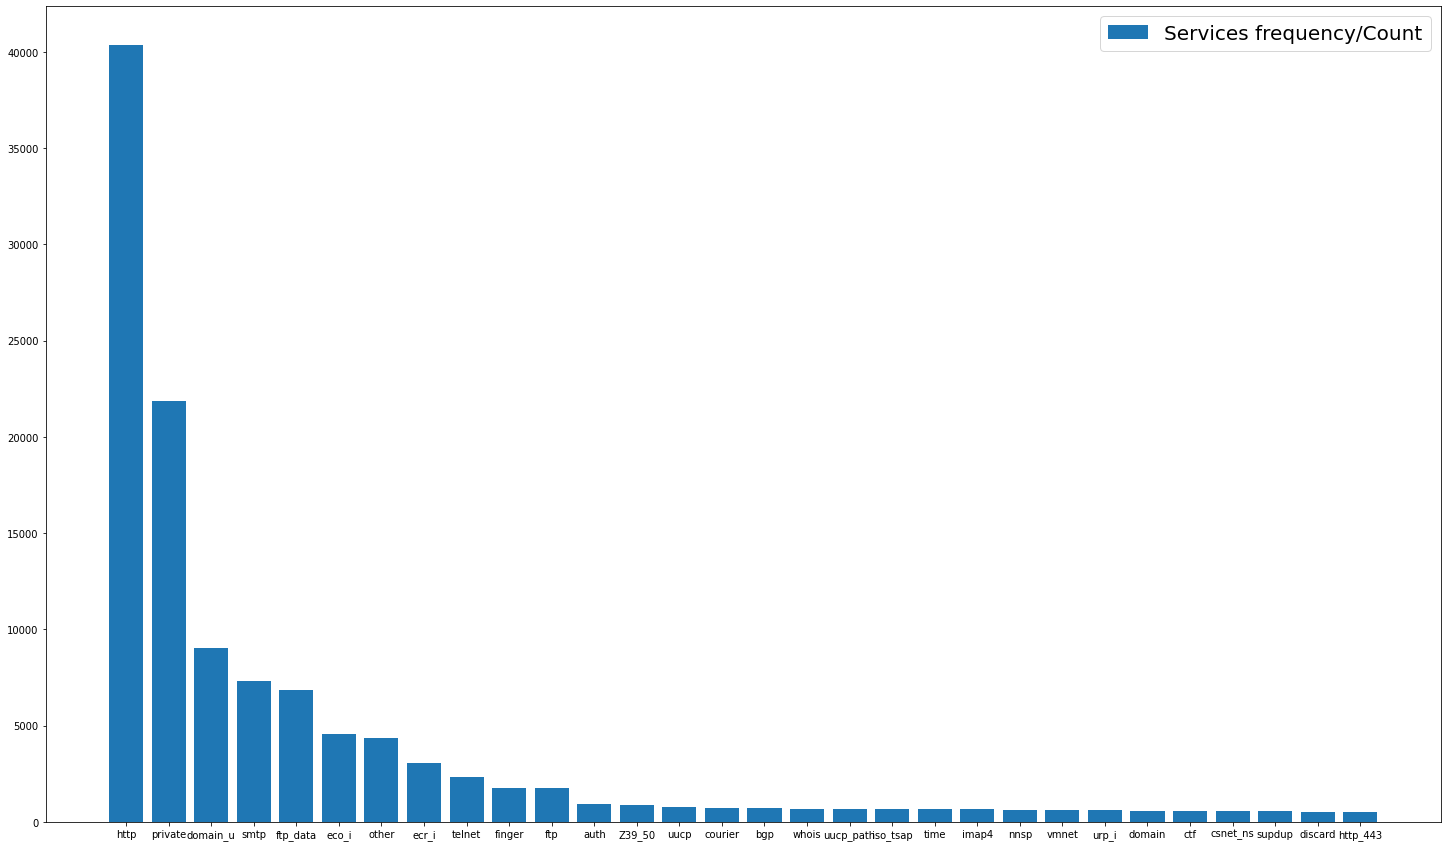

In [ ]:
f, ax = plt.subplots(figsize=(25,15)) # set the size that you'd like (width, height)
plt.bar(subset_service, service_count[:30], label = 'Services frequency/Count')
ax.legend(fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


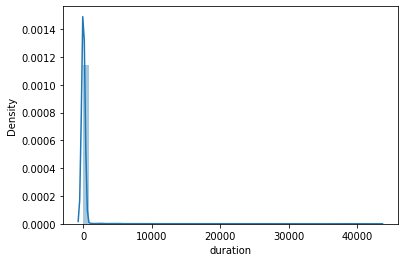

In [ ]:
duration_df = train_df['duration']
duration_df = pd.DataFrame(duration_df)
df_feature = duration_df.columns

for feature in df_feature:
    p = sns.distplot(a = duration_df[feature])
    plt.show()

In [ ]:
duration_df['binned']=pd.cut(duration_df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000])
duration_df.head()

,duration,binned
0,0,"(-0.1, 0.0]"
1,0,"(-0.1, 0.0]"
2,0,"(-0.1, 0.0]"
3,0,"(-0.1, 0.0]"
4,0,"(-0.1, 0.0]"


In [ ]:
duration_df['duration_bin']=pd.cut(duration_df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000], labels=["0", " (0, 10000]", "(10000, 20000]","(20000, 30000]", "(30000, 40000]"])
duration_df

,duration,binned,duration_bin
0,0,"(-0.1, 0.0]",0
1,0,"(-0.1, 0.0]",0
2,0,"(-0.1, 0.0]",0
3,0,"(-0.1, 0.0]",0
4,0,"(-0.1, 0.0]",0
...,...,...,...
125968,0,"(-0.1, 0.0]",0
125969,8,"(0.0, 10000.0]","(0, 10000]"
125970,0,"(-0.1, 0.0]",0
125971,0,"(-0.1, 0.0]",0


In [ ]:
duration_count = duration_df['duration_bin'].value_counts()
duration_count

0                 115955
 (0, 10000]         8804
(10000, 20000]       585
(30000, 40000]       281
(20000, 30000]       223
Name: duration_bin, dtype: int64

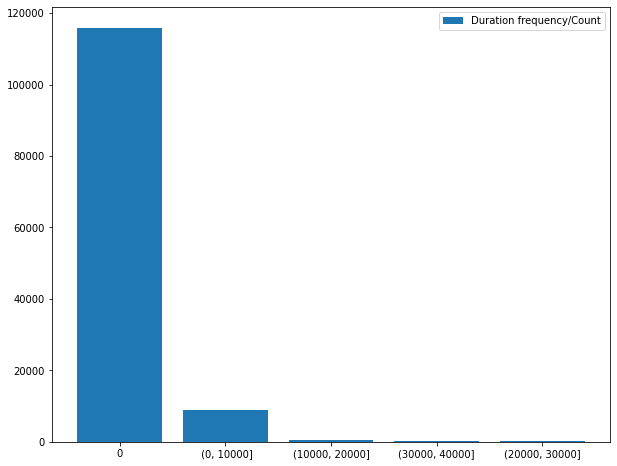

In [ ]:
f, ax = plt.subplots(figsize=(10,8)) # set the size that you'd like (width, height)
plt.bar(duration_count.index, duration_count, label = 'Duration frequency/Count')
ax.legend()

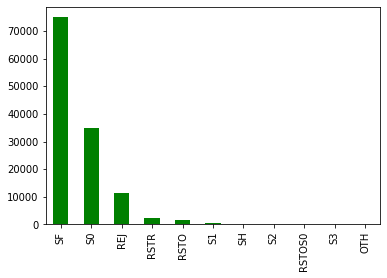

In [ ]:
bar_graph('flag')

In [ ]:
df= pd.DataFrame(columns=['protocol', 'Attack_class', 'number of sample in Dataset'])

In [ ]:
protocol = pd.Series(train_df['protocol_type']).unique()
label = pd.Series(train_df['label']).unique() 
label= np.delete(label, np.where(label == 'normal'))

In [ ]:
for pro in protocol:
  for lab in label:
    i = len(train_df.loc[(train_df['protocol_type']== pro) & (train_df['label']==lab)])
    if (i != 0):
      df=df.append({'protocol': pro, 'Attack_class': lab, 'number of sample in Dataset': i}, ignore_index=True)


In [ ]:
df.sort_values(by=['number of sample in Dataset'], ascending=False, ignore_index=True)

,protocol,Attack_class,number of sample in Dataset
0,tcp,Dos,42188
1,tcp,Probe,5857
2,icmp,Probe,4135
3,icmp,Dos,2847
4,udp,Probe,1664
5,tcp,R2L,995
6,udp,Dos,892
7,tcp,U2R,49
8,udp,U2R,3


In [ ]:
service_df= pd.DataFrame(columns=['service', 'Attack_class', 'number of sample in Dataset'])

In [ ]:
service = list(service_count.index)
label_service = pd.Series(train_df['label']).unique() 
label_service= np.delete(label_service, np.where(label == 'normal'))

In [ ]:
for ser in service:
  for lab in label_service:
    i = len(train_df.loc[(train_df['service']== ser) & (train_df['label']==lab)])
    if (i != 0):
      service_df= service_df.append({'service': ser, 'Attack_class': lab, 'number of sample in Dataset': i}, ignore_index=True)

In [ ]:
service_df.sort_values(by=['number of sample in Dataset'], ascending=False)

,service,Attack_class,number of sample in Dataset
0,http,normal,38049
5,private,Dos,15971
7,domain_u,normal,9034
9,smtp,normal,7029
12,ftp_data,normal,4984
...,...,...,...
154,http_8001,Probe,2
155,aol,Probe,2
156,harvest,Probe,2
133,IRC,Probe,1


In [ ]:
service_protocol= pd.crosstab(train_df.service,train_df['protocol_type'],margins=True).T.style.background_gradient(cmap='YlOrBr')
service_protocol

service,IRC,X11,Z39_50,aol,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,harvest,hostnames,http,http_2784,http_443,http_8001,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,All
protocol_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
icmp,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4586,3077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,8,0,10,602,0,0,0,0,8291
tcp,187,73,862,2,955,710,734,545,563,521,538,569,0,434,0,0,485,474,1767,1754,6860,518,2,460,40338,1,530,2,647,687,433,299,410,475,429,439,451,405,347,362,360,630,296,0,1871,5,78,264,69,18562,0,78,86,65,7313,245,311,381,544,477,2353,0,0,654,0,0,780,689,617,693,102689
udp,0,0,0,0,0,0,0,0,0,0,0,0,9043,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,2488,0,0,0,0,3291,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,14993
All,187,73,862,2,955,710,734,545,563,521,538,569,9043,434,4586,3077,485,474,1767,1754,6860,518,2,460,40338,1,530,2,647,687,433,299,410,475,429,439,451,405,347,362,360,630,296,168,4359,5,78,264,69,21853,8,78,86,65,7313,245,311,381,544,477,2353,3,8,654,10,602,780,689,617,693,125973


In [ ]:
bivariate_df= pd.DataFrame(columns=['protocol', 'service', 'label', 'number of sample in Dataset'])

In [ ]:
service = list(service_count.index)
protocol = pd.Series(train_df['protocol_type']).unique()
label = pd.Series(train_df['label']).unique() 

for ser in service:
  for pro in protocol:
    for lab in label:
      i = len(train_df.loc[(train_df['service']== ser) & (train_df['protocol_type']== pro) & (train_df['label']==lab)])
      if (i != 0):
        bivariate_df= bivariate_df.append({'protocol': pro, 'service': ser, 'label': lab, 'number of sample in Dataset': i}, ignore_index=True)
        

In [ ]:
bivariate_df.sort_values(by=['number of sample in Dataset'], ascending=False)

,protocol,service,label,number of sample in Dataset
0,tcp,http,normal,38049
5,tcp,private,Dos,15079
10,udp,domain_u,normal,9034
12,tcp,smtp,normal,7029
15,tcp,ftp_data,normal,4984
...,...,...,...,...
111,tcp,login,R2L,2
159,tcp,http_8001,Probe,2
160,tcp,aol,Probe,2
138,tcp,IRC,Probe,1


In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(train_df.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = train_df.copy()
bin_data['label'] = bin_label
bin_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# label encoding (0,1) binary labels (abnormal,normal)
le = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le.fit_transform)
bin_data['intrusion'] = enc_label
bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# one-hot-encoding attack label
#numeric_bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
bin_data = pd.get_dummies(train_df,columns=['protocol_type','service','flag'],prefix="",prefix_sep="") 
#bin_data['label'] = bin_label
bin_data['intrusion'] =enc_label
bin_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


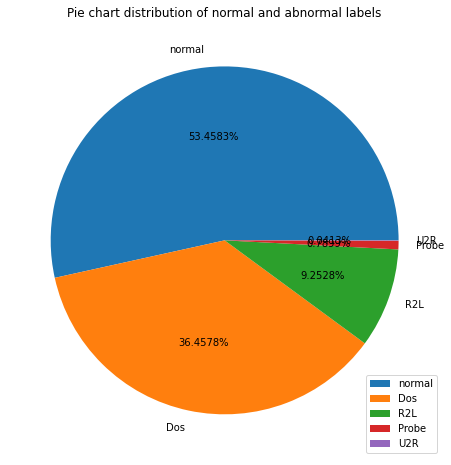

In [ ]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.4f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [ ]:
#bin_data_train is dataset that is ready for modeling ... X=bin_data_train[:,:122] / y=bin_data_train[:,:-1]
bin_data_train = bin_data.copy()
bin_data_train.drop(labels= [ 'label'], axis=1, inplace=True)
bin_data_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
# this data set is include just numeric features with multi labels 
#created for feature selection
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
numeric_col = train_df.select_dtypes(include='number').columns
numeric_bin_data = train_df[numeric_col]
numeric_bin_data['intrusion'] = bin_data['intrusion']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
numeric_bin_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = train_df.copy()
multi_label = pd.DataFrame(multi_data.label)
multi_label

,label
0,normal
1,normal
2,Dos
3,normal
4,normal
...,...
125968,Dos
125969,normal
125970,normal
125971,Dos


In [ ]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#y_mul = multi_data['intrusion']
multi_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,4
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,4
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,4
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,4


In [ ]:
# one-hot-encoding attack label

multi_data = pd.get_dummies(multi_data,columns=['protocol_type','service','flag','label'],prefix="",prefix_sep="")  
multi_data['label'] = multi_label
multi_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,S2,S3,SF,SH,Dos,Probe,R2L,U2R,normal,label
0,0,491,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
1,0,146,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
4,0,199,420,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos


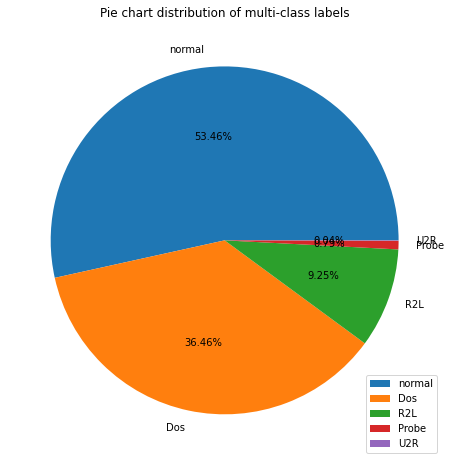

In [ ]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.show()

In [ ]:
# multi_data_train is dataset that is ready for modeling ... X=bin_data_train[:,:122] / y=bin_data_train[:,:-5]
multi_data_train = multi_data.copy()
multi_data_train.drop(labels= [ 'label', 'intrusion' ], axis=1, inplace=True)
multi_data_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,S1,S2,S3,SF,SH,Dos,Probe,R2L,U2R,normal
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# this data set is include just numeric features with multi labels 
#created for feature selection
numeric_multi_data = train_df[numeric_col]
numeric_multi_data['label'] = multi_label
numeric_multi_data = pd.get_dummies(numeric_multi_data,columns=['label'],prefix="",prefix_sep="")
numeric_multi_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Dos,Probe,R2L,U2R,normal
0,0,491,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,0,0,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0.04,0.03,0.01,0.00,0.01,0,0,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1


In [ ]:
#num_dataset_bin is just include numeric features with binary labels
num_dataset_bin = numeric_bin_data.copy()
Y_train_num= num_dataset_bin[['intrusion']]
X_train_num= num_dataset_bin.drop(labels=['intrusion'], axis=1)

print(X_train_num.shape)
print(Y_train_num.shape)

(125973, 38)
(125973, 1)


In [ ]:
#dataset_bin is include hole features (with encoded non numeric features like services, protocol and flag) with binary labels
dataset_bin = bin_data_train.copy()
Y_train_bin= dataset_bin[['intrusion']]
X_train_bin= dataset_bin.drop(labels=['intrusion'], axis=1)

print(X_train_bin.shape)
print(Y_train_bin.shape)

(125973, 122)
(125973, 1)


In [ ]:
#num_dataset_multi is just include numeric features with multi-class labels
num_dataset_multi = numeric_multi_data.copy()
Y_train_num_multi= num_dataset_multi.loc[:, 'Dos':]
X_train_num_multi= num_dataset_multi.loc[:, :'dst_host_srv_rerror_rate']

print(X_train_num_multi.shape)
print(Y_train_num_multi.shape)

(125973, 38)
(125973, 5)


In [ ]:
#dataset_multi is include hole features (with encoded non numeric features like services, protocol and flag) with multi-class labels
dataset_multi = multi_data_train.copy()
Y_train_multi= dataset_multi.loc[:, 'Dos':]
X_train_multi= dataset_multi.loc[:, :'SH']

print(X_train_multi.shape)
print(Y_train_multi.shape)

(125973, 122)
(125973, 5)


In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
correlation= numeric_bin_data.corr()
correlation_y = abs(correlation['intrusion'])
highest_correlation = correlation_y[correlation_y >0.5]
highest_correlation.sort_values(ascending=True)

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
intrusion                   1.000000
Name: intrusion, dtype: float64

In [ ]:
highest_correlation_columns= highest_correlation.index

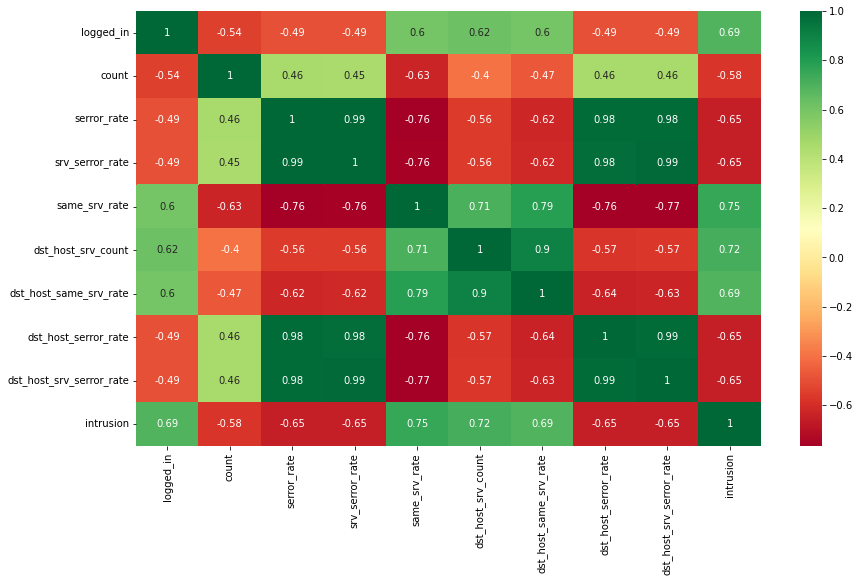

In [ ]:
plt.figure(figsize=(14,8))
a=sns.heatmap(bin_data[highest_correlation.index].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# then joining encoded, one-hot-encoded, and original attack label attribute
modified_bin_dataset = numeric_bin_data[highest_correlation_columns]
modified_bin_dataset.head()

,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,intrusion
0,0,2,0.0,0.0,1.00,25,0.17,0.00,0.00,1
1,0,13,0.0,0.0,0.08,1,0.00,0.00,0.00,1
2,0,123,1.0,1.0,0.05,26,0.10,1.00,1.00,0
3,1,5,0.2,0.2,1.00,255,1.00,0.03,0.01,1
4,1,30,0.0,0.0,1.00,255,1.00,0.00,0.00,1


In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
correlation = numeric_multi_data.corr()
correlation_y = abs(correlation[Y_train_num_multi.columns])
highest_correlation = correlation_y[correlation_y >0.5]
highest_correlation

,Dos,Probe,R2L,U2R,normal
duration,NaN,NaN,NaN,NaN,NaN
src_bytes,NaN,NaN,NaN,NaN,NaN
dst_bytes,NaN,NaN,NaN,NaN,NaN
land,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN
urgent,NaN,NaN,NaN,NaN,NaN
hot,NaN,NaN,NaN,NaN,NaN
num_failed_logins,NaN,NaN,NaN,NaN,NaN
logged_in,0.580713,NaN,NaN,NaN,0.690171
num_compromised,NaN,NaN,NaN,NaN,NaN


In [ ]:
Dos_features= highest_correlation[highest_correlation.Dos.notnull()].index
Probe_features= highest_correlation[highest_correlation.Probe.notnull()].index
R2L_features= highest_correlation[highest_correlation.R2L.notnull()].index
U2R_features= highest_correlation[highest_correlation.U2R.notnull()].index
normal_features= highest_correlation[highest_correlation.normal.notnull()].index

In [ ]:
Dos_features.intersection(Probe_features)

Index([], dtype='object')

In [ ]:
modified_multi_features = list(set(Dos_features.union(normal_features).union(Probe_features).union(R2L_features).union(U2R_features)))
for lab in Y_train_num_multi.columns:
  modified_multi_features.remove(lab)
modified_multi_features

['dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'logged_in',
 'serror_rate',
 'count',
 'srv_serror_rate',
 'dst_host_serror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_serror_rate',
 'same_srv_rate',
 'dst_host_srv_count']

In [ ]:
modified_multi_features = list(set(Dos_features.union(normal_features).union(Probe_features).union(R2L_features).union(U2R_features)))
for lab in Y_train_num_multi.columns:
  modified_multi_features.remove(lab)
modified_multi_features

['dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'logged_in',
 'serror_rate',
 'count',
 'srv_serror_rate',
 'dst_host_serror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_serror_rate',
 'same_srv_rate',
 'dst_host_srv_count']

In [ ]:
#feature selection of all features (numeric and categorical features)
chi_scores = chi2(X_train_bin,Y_train_bin)
chi_scores

(array([7.08280969e+06, 3.34032490e+09, 1.74609581e+09, 6.51239512e+00,
        3.28272717e+03, 1.81710838e+00, 4.87618999e+02, 2.97369498e+00,
        3.62591460e+04, 2.68943252e+04, 5.17680356e+01, 1.17303524e+02,
        3.25504830e+04, 1.05355586e+03, 1.34709608e+01, 4.09027580e+02,
                   nan, 8.70617585e-01, 1.92525066e+02, 6.52574244e+06,
        1.42326958e+01, 3.73654160e+04, 3.74519039e+04, 6.92353165e+03,
        6.99752801e+03, 2.08265018e+04, 2.69428137e+03, 1.24533866e+03,
        9.57432784e+05, 6.96870490e+06, 2.34477802e+04, 3.19789138e+03,
        6.92743399e+02, 1.90567199e+02, 3.72260458e+04, 3.85444066e+04,
        6.35482480e+03, 6.86709925e+03, 4.72870818e+03, 6.57169092e+01,
        5.23482354e+03, 1.59085746e+02, 4.30897575e+01, 9.90101757e+02,
        2.29721985e+00, 3.17181626e+02, 8.15513048e+02, 8.43079686e+02,
        6.25992410e+02, 6.46667389e+02, 5.98425772e+02, 6.17952141e+02,
        5.00464631e+02, 7.83935970e+03, 4.98496708e+02, 3.348288

In [ ]:
p_values = pd.Series(chi_scores[1],index = X_train_bin.columns)
p_values.sort_values(ascending = False , inplace = True)

In [ ]:
#select 20 best features
p_values = p_values[:20]

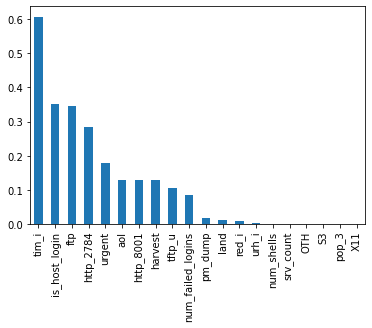

In [ ]:
p_values.plot.bar()

In [ ]:
#feature selection of numeric features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X_train_num,Y_train_num)

In [ ]:
scores = pd.DataFrame(fit.scores_)
columns_df = pd.DataFrame(X_train_num.columns)

In [ ]:
#concat two dataframes for better visualization 
feature_score = pd.concat([columns_df,scores],axis=1)
feature_score.columns = ['Specs','Score']  #naming the dataframe columns
feature_score

,Specs,Score
0,duration,7.082810e+06
1,src_bytes,3.340325e+09
2,dst_bytes,1.746096e+09
3,land,6.512395e+00
4,wrong_fragment,3.282727e+03
5,urgent,1.817108e+00
6,hot,4.876190e+02
7,num_failed_logins,2.973695e+00
8,logged_in,3.625915e+04
9,num_compromised,2.689433e+04


In [ ]:
chi_best = pd.DataFrame(feature_score.nlargest(10,'Score'))  #print 10 best features
chi_best

,Specs,Score
1,src_bytes,3.340325e+09
2,dst_bytes,1.746096e+09
0,duration,7.082810e+06
29,dst_host_srv_count,6.968705e+06
19,count,6.525742e+06
28,dst_host_count,9.574328e+05
35,dst_host_srv_serror_rate,3.854441e+04
22,srv_serror_rate,3.745190e+04
21,serror_rate,3.736542e+04
34,dst_host_serror_rate,3.722605e+04


In [ ]:
chi_best = list(chi_best['Specs'])

In [ ]:
chi_dataset = X_train_num[chi_best]
chi_dataset.head()

,src_bytes,dst_bytes,duration,dst_host_srv_count,count,dst_host_count,dst_host_srv_serror_rate,srv_serror_rate,serror_rate,dst_host_serror_rate
0,491,0,0,25,2,150,0.00,0.0,0.0,0.00
1,146,0,0,1,13,255,0.00,0.0,0.0,0.00
2,0,0,0,26,123,255,1.00,1.0,1.0,1.00
3,232,8153,0,255,5,30,0.01,0.2,0.2,0.03
4,199,420,0,255,30,255,0.00,0.0,0.0,0.00


In [ ]:
model_tree = ExtraTreesClassifier()
model_tree.fit(X_train_multi,Y_train_multi)

ExtraTreesClassifier()

In [ ]:
print(model_tree.feature_importances_) 

[2.36322854e-03 2.48194433e-02 5.48969029e-03 4.07520791e-05
 9.66550184e-03 1.83943733e-05 6.35789013e-03 2.47084405e-04
 4.98130651e-02 4.00532667e-03 2.20336453e-04 3.37389789e-05
 3.50757950e-04 1.21169159e-04 5.98273827e-05 8.19642712e-05
 0.00000000e+00 2.33283886e-07 1.05041667e-03 1.99224088e-02
 1.31976217e-02 5.51215633e-02 4.51562871e-02 1.76536008e-02
 1.96801727e-02 8.93336609e-02 2.41556217e-02 9.48173145e-03
 1.82207203e-02 3.24454335e-02 3.66505489e-02 2.46858455e-02
 3.18471316e-02 1.12702272e-02 5.76934871e-02 6.07513654e-02
 1.67152305e-02 1.12612245e-02 2.66590149e-02 9.54049005e-03
 8.96863266e-03 5.45664933e-04 7.42281814e-05 9.64337041e-05
 4.20751610e-07 1.61400206e-04 7.56234048e-05 8.73241644e-05
 4.82122132e-06 1.29612160e-05 1.19083002e-05 1.45370671e-05
 5.90815289e-05 6.40296117e-03 3.59943280e-05 2.24265504e-02
 2.17626854e-02 4.40660203e-06 2.90596324e-05 3.22671981e-04
 8.31349647e-04 3.05840940e-03 9.70781802e-05 5.63691298e-07
 2.03633753e-06 2.671162

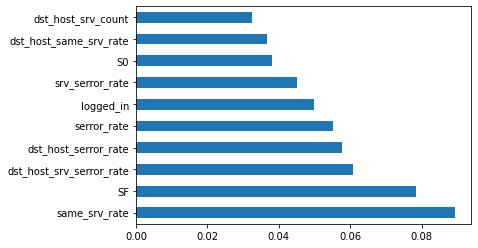

In [ ]:
#plot graph of feature importances for better visualization
feature_importance = pd.Series(model_tree.feature_importances_, index=X_train_multi.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
model_tree1 = ExtraTreesClassifier()
model_tree1.fit(X_train_num_multi,Y_train_num_multi)

ExtraTreesClassifier()

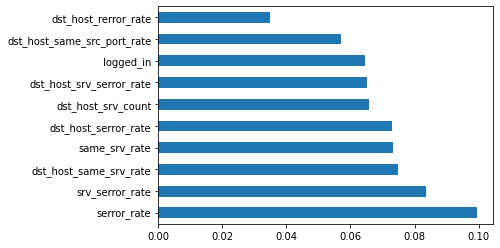

In [ ]:
#plot graph of feature importances for better visualization
feature_importance1 = pd.Series(model_tree1.feature_importances_, index=X_train_num_multi.columns)
feature_importance1.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
model_xgboost = xgboost.XGBClassifier()
model_xgboost.fit(X_train_bin,Y_train_bin)
print(model_xgboost.feature_importances_) 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1.23300208e-02 2.31085449e-01 8.90181437e-02 6.66709966e-04
 3.12242797e-03 0.00000000e+00 2.48558018e-02 2.00511701e-03
 1.28182853e-02 1.58693381e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.91620025e-03 4.13490124e-02
 1.52267767e-02 0.00000000e+00 1.43733690e-03 0.00000000e+00
 0.00000000e+00 3.79242795e-03 3.24621648e-02 0.00000000e+00
 4.21092845e-03 2.24288236e-02 3.30583155e-02 5.80613967e-03
 2.48216745e-02 4.15033661e-03 6.56592706e-03 1.52008655e-02
 5.51805971e-03 2.49715615e-03 9.44541115e-03 1.09861596e-02
 1.59244775e-03 9.26092034e-04 1.21893187e-03 0.00000000e+00
 0.00000000e+00 8.22587113e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.14988731e-03 0.00000000e+00 2.47341068e-03
 1.98815778e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.12674158e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.125500

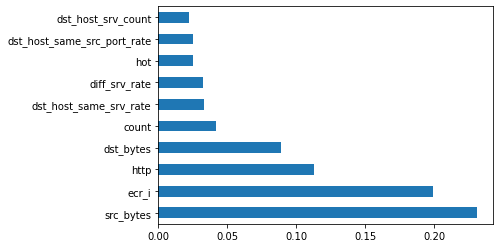

<Figure size 576x432 with 0 Axes>

In [ ]:
# plot the graph of feature importances for better visualization 
#feature selection of numeric dataser

features_imp = pd.Series(model_xgboost.feature_importances_, index=X_train_bin.columns)
features_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

In [ ]:
model_xgboost1 = xgboost.XGBClassifier()
model_xgboost1.fit(X_train_num,Y_train_num)
print(model_xgboost1.feature_importances_) 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.01528803 0.30894575 0.09543632 0.         0.01647749 0.
 0.04316606 0.01038139 0.0045208  0.02576034 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00384723 0.07670595 0.09900998 0.0025553  0.00260526 0.00640187
 0.0030654  0.0007884  0.05099013 0.00357365 0.00171655 0.05962712
 0.04618844 0.00882657 0.05441181 0.00855961 0.01134218 0.00478484
 0.00896286 0.02606066]


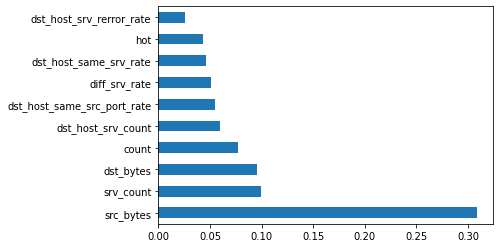

<Figure size 576x432 with 0 Axes>

In [ ]:
# plot the graph of feature importances for better visualization 
#feature selection of hole dataset

feature_imp = pd.Series(model_xgboost1.feature_importances_, index=X_train_num.columns)
feature_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

In [ ]:
# selecting numeric attributes columns from data
numeric_col = train_df.select_dtypes(include='number').columns

In [ ]:
# using standard scaler for normalizing
s_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = s_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
# calling the normalization() function
data_standard = standardization(train_df.copy(),numeric_col)

In [ ]:
data_standard.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


In [ ]:
# selecting categorical data attributes
categorical_col = ['protocol_type','service','flag']

In [ ]:
# creating a dataframe with only categorical attributes
categorical = data_standard[categorical_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical_onehotencoding= pd.get_dummies(categorical,columns=categorical_col)
categorical_onehotencoding.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
normalized_dataset = pd.concat([categorical, data_standard],axis=1)
normalized_dataset.drop(labels=categorical_col, axis=1, inplace=True)

In [ ]:
#Normalized_dataset = pd.get_dummies(Normalized_dataset, columns=Normalized_dataset['label'])
#Normalized_dataset
X = normalized_dataset.loc[:,:'dst_host_srv_rerror_rate']
Y = numeric_bin_data['intrusion']

In [ ]:
y_multi = multi_data['label']

In [ ]:
y_multi = LabelBinarizer().fit_transform(y_multi)

In [ ]:
y_multi

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [ ]:
y_multi

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [ ]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5) # creating model for 5 neighbors
knn.fit(X_train,Y_train) # training model on training dataset

KNeighborsClassifier()

In [ ]:
Y_pred=knn.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(Y_test, Y_pred)*100 # calculating accuracy of predicted data
print(ac)

99.21412978765628


In [ ]:
# classification report
print(classification_report(Y_test, Y_pred,target_names=le.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     11773
      normal       0.99      0.99      0.99     13422

    accuracy                           0.99     25195
   macro avg       0.99      0.99      0.99     25195
weighted avg       0.99      0.99      0.99     25195



In [ ]:
print("Mean Absolute Error - " , mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error - " , mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error - " , np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("R2 Score - " , explained_variance_score(Y_test, Y_pred)*100)
print("Accuracy - ",accuracy_score(Y_test,Y_pred)*100)

Mean Absolute Error -  0.00785870212343719
Mean Squared Error -  0.00785870212343719
Root Mean Squared Error -  0.08864932105457543
R2 Score -  96.8430868218237
Accuracy -  99.21412978765628
